### Importing the data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)

In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se


df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)


In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:

df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')



In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [11]:
df_vs1.columns = col(61,'vs1')

In [12]:
df_ce.columns = col(61,'ce')

In [13]:
df_cp.columns = col(61,'cp')

In [14]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)

In [15]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [16]:
#pip install tsfresh

### Function for window statistical features

In [17]:
df_ps4.filter(regex="ps_mean_.*").head()

""
0
1
2
3
4


In [18]:
def sensor_statistic(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].mean(axis=1)

    return df_statistic



In [19]:
window_length = 300
ps1_window_mean  = sensor_statistic(df_ps1, window_length, 'ps1_mean_')

ps2_window_mean  = sensor_statistic(df_ps2, window_length, 'ps2_mean_')

ps3_window_mean  = sensor_statistic(df_ps3, window_length, 'ps3_mean_')

ps4_window_mean  = sensor_statistic(df_ps4, window_length, 'ps4_mean_')

ps5_window_mean  = sensor_statistic(df_ps5, window_length, 'ps5_mean_')

ps6_window_mean  = sensor_statistic(df_ps6, window_length, 'ps6_mean_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [20]:
window_length = 3
ts1_window_mean  = sensor_statistic(df_ts1, window_length, 'ts1_mean_')

ts2_window_mean  = sensor_statistic(df_ts2, window_length,'ts2_mean_')

ts3_window_mean  = sensor_statistic(df_ts3, window_length,'ts3_mean_')

ts4_window_mean  = sensor_statistic(df_ts4, window_length,'ts4_mean_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [21]:
window_length = 30
fs1_window_mean  = sensor_statistic(df_fs1, window_length,'fs1_mean_')

fs2_window_mean  = sensor_statistic(df_fs2, window_length,'fs2_mean_')


20 30 (2205, 600)
20 30 (2205, 600)


In [22]:
window_length = 3

ce_window_mean  = sensor_statistic(df_ce, window_length,'ce_mean_')

cp_window_mean  = sensor_statistic(df_cp, window_length,'cp_mean_')

se_window_mean  = sensor_statistic(df_se, window_length,'se_mean_')

vs1_window_mean  = sensor_statistic(df_vs1, window_length,'vs1_mean_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [23]:
window_length = 300
eps1_window_mean  = sensor_statistic(df_eps1, window_length,'eps1_mean_')


20 300 (2205, 6000)


In [24]:
mean_data = pd.concat([ps1_window_mean, ps2_window_mean, ps3_window_mean, ps4_window_mean, ps5_window_mean, 
                      ps6_window_mean, ts1_window_mean, ts2_window_mean, ts3_window_mean, ts4_window_mean,
                      fs1_window_mean, fs2_window_mean, eps1_window_mean, vs1_window_mean, ce_window_mean, 
                      cp_window_mean, se_window_mean], axis = 1)

In [25]:
mean_data.shape

(2205, 340)

### Calculate median for all sensors

In [26]:
def sensor_median(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].median(axis=1)

    return df_statistic



In [27]:
window_length = 300

ps1_window_median  = sensor_median(df_ps1, window_length, 'ps1_median_')

ps2_window_median  = sensor_median(df_ps2, window_length, 'ps2_median_')

ps3_window_median  = sensor_median(df_ps3, window_length, 'ps3_median_')

ps4_window_median  = sensor_median(df_ps4, window_length, 'ps4_median_')

ps5_window_median  = sensor_median(df_ps5, window_length, 'ps5_median_')

ps6_window_median  = sensor_median(df_ps6, window_length, 'ps6_median_')

eps1_window_median  = sensor_median(df_eps1, window_length,'eps1_median_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [28]:
window_length = 3
ts1_window_median  = sensor_median(df_ts1, window_length, 'ts1_median_')

ts2_window_median  = sensor_median(df_ts2, window_length,'ts2_median_')

ts3_window_median  = sensor_median(df_ts3, window_length,'ts3_median_')

ts4_window_median  = sensor_median(df_ts4, window_length,'ts4_median_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [29]:
window_length = 30
fs1_window_median  = sensor_median(df_fs1, window_length,'fs1_median_')

fs2_window_median  = sensor_median(df_fs2, window_length,'fs2_median_')


20 30 (2205, 600)
20 30 (2205, 600)


In [30]:
window_length = 3

ce_window_median  = sensor_median(df_ce, window_length,'ce_median_')

cp_window_median  = sensor_median(df_cp, window_length,'cp_median_')

se_window_median  = sensor_median(df_se, window_length,'se_median_')

vs1_window_median  = sensor_median(df_vs1, window_length,'vs1_median_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [31]:
median_data = pd.concat([ps1_window_median, ps2_window_median, ps3_window_median, ps4_window_median, ps5_window_median,
                                    ps6_window_median, ts1_window_median, ts2_window_median, ts3_window_median, ts4_window_median,
                                    fs1_window_median, fs2_window_median, eps1_window_median, vs1_window_median, ce_window_median,
                                    cp_window_median, se_window_median], axis = 1)
                         

In [32]:
median_data.shape

(2205, 340)

### Finding the maximum 

In [33]:
def sensor_max(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].max(axis=1)

    return df_statistic



In [34]:
window_length = 300

ps1_window_max  = sensor_max(df_ps1, window_length, 'ps1_max_')

ps2_window_max  = sensor_max(df_ps2, window_length, 'ps2_max_')

ps3_window_max  = sensor_max(df_ps3, window_length, 'ps3_max_')

ps4_window_max  = sensor_max(df_ps4, window_length, 'ps4_max_')

ps5_window_max  = sensor_max(df_ps5, window_length, 'ps5_max_')

ps6_window_max  = sensor_max(df_ps6, window_length, 'ps6_max_')

eps1_window_max  = sensor_max(df_eps1, window_length,'eps1_max_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [35]:
window_length = 3
ts1_window_max  = sensor_max(df_ts1, window_length, 'ts1_max_')

ts2_window_max  = sensor_max(df_ts2, window_length,'ts2_max_')

ts3_window_max  = sensor_max(df_ts3, window_length,'ts3_max_')

ts4_window_max  = sensor_max(df_ts4, window_length,'ts4_max_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [36]:
window_length = 30
fs1_window_max  = sensor_max(df_fs1, window_length,'fs1_max_')

fs2_window_max  = sensor_max(df_fs2, window_length,'fs2_max_')


20 30 (2205, 600)
20 30 (2205, 600)


In [37]:
window_length = 3

ce_window_max  = sensor_max(df_ce, window_length,'ce_max_')

cp_window_max  = sensor_max(df_cp, window_length,'cp_max_')

se_window_max  = sensor_max(df_se, window_length,'se_max_')

vs1_window_max  = sensor_max(df_vs1, window_length,'vs1_max_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [38]:
max_data = pd.concat([ps1_window_max, ps2_window_max, ps3_window_max, ps4_window_max, ps5_window_max,
                      ps6_window_max, ts1_window_max, ts2_window_max, ts3_window_max, ts4_window_max,
                      fs1_window_max, fs2_window_max, eps1_window_max, vs1_window_max,
                      ce_window_max, cp_window_max, se_window_max], axis = 1)

In [39]:
max_data.shape

(2205, 340)

### Calculating the min 

In [40]:
def sensor_min(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].min(axis=1)

    return df_statistic


In [41]:
window_length = 300

ps1_window_min  = sensor_min(df_ps1, window_length, 'ps1_min_')

ps2_window_min  = sensor_max(df_ps2, window_length, 'ps2_min_')

ps3_window_min  = sensor_max(df_ps3, window_length, 'ps3_min_')

ps4_window_min  = sensor_max(df_ps4, window_length, 'ps4_min_')

ps5_window_min  = sensor_max(df_ps5, window_length, 'ps5_min_')

ps6_window_min  = sensor_max(df_ps6, window_length, 'ps6_min_')

eps1_window_min  = sensor_max(df_eps1, window_length,'eps1_min_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [42]:
window_length = 3
ts1_window_min  = sensor_min(df_ts1, window_length, 'ts1_min_')

ts2_window_min  = sensor_min(df_ts2, window_length,'ts2_min_')

ts3_window_min  = sensor_min(df_ts3, window_length,'ts3_min_')

ts4_window_min  = sensor_min(df_ts4, window_length,'ts4_min_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [43]:
window_length = 30
fs1_window_min  = sensor_min(df_fs1, window_length,'fs1_min_')

fs2_window_min  = sensor_min(df_fs2, window_length,'fs2_min_')


20 30 (2205, 600)
20 30 (2205, 600)


In [44]:
window_length = 3

ce_window_min  = sensor_min(df_ce, window_length,'ce_min_')

cp_window_min  = sensor_min(df_cp, window_length,'cp_min_')

se_window_min  = sensor_min(df_se, window_length,'se_min_')

vs1_window_min  = sensor_min(df_vs1, window_length,'vs1_min_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [45]:
Min_data = pd.concat([ps1_window_min, ps2_window_min, ps3_window_min, ps4_window_min, ps5_window_min,  ps6_window_min, 
                      ts1_window_min, ts2_window_min, ts3_window_min, ts4_window_min, 
                      fs1_window_min, fs2_window_min, eps1_window_min, vs1_window_min, 
                      ce_window_min, cp_window_min, se_window_min], axis = 1)

In [46]:
import statistics as st

### Calculate the variance 

In [47]:
def sensor_variance(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].var(axis=1)

    return df_statistic


In [48]:
window_length = 300

ps1_window_variance  = sensor_variance(df_ps1, window_length, 'ps1_variance_')

ps2_window_variance  = sensor_variance(df_ps2, window_length, 'ps2_variance_')

ps3_window_variance  = sensor_variance(df_ps3, window_length, 'ps3_variance_')

ps4_window_variance  = sensor_variance(df_ps4, window_length, 'ps4_variance_')

ps5_window_variance  = sensor_variance(df_ps5, window_length, 'ps5_variance_')

ps6_window_variance  = sensor_variance(df_ps6, window_length, 'ps6_variance_')

eps1_window_variance  = sensor_variance(df_eps1, window_length,'eps1_variance_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [49]:
window_length = 3
ts1_window_variance  = sensor_variance(df_ts1, window_length, 'ts1_variance_')

ts2_window_variance  = sensor_variance(df_ts2, window_length,'ts2_variance_')

ts3_window_variance  = sensor_variance(df_ts3, window_length,'ts3_variance_')

ts4_window_variance  = sensor_variance(df_ts4, window_length,'ts4_variance_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [50]:
window_length = 30

fs1_window_variance  = sensor_variance(df_fs1, window_length,'fs1_variance_')

fs2_window_variance  = sensor_variance(df_fs2, window_length,'fs2_variance_')


20 30 (2205, 600)
20 30 (2205, 600)


In [51]:
window_length = 3

ce_window_variance  = sensor_variance(df_ce, window_length,'ce_variance_')

cp_window_variance  = sensor_variance(df_cp, window_length,'cp_variance_')

se_window_variance  = sensor_variance(df_se, window_length,'se_variance_')

vs1_window_variance  = sensor_variance(df_vs1, window_length,'vs1_variance_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [52]:
variance_data = pd.concat([ps1_window_variance, ps2_window_variance, ps3_window_variance, ps4_window_variance, ps5_window_variance,  ps6_window_variance, 
                           ts1_window_variance, ts2_window_variance, ts3_window_variance, ts4_window_variance, 
                           fs1_window_variance, fs2_window_variance, eps1_window_variance, vs1_window_variance, 
                           ce_window_variance, cp_window_variance, se_window_variance], axis = 1)

### Calculating standard deviation

In [53]:
def sensor_std(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].std(axis=1)

    return df_statistic


In [54]:
window_length = 300

ps1_window_std  = sensor_std(df_ps1, window_length, 'ps1_std_')

ps2_window_std  = sensor_std(df_ps2, window_length, 'ps2_std_')

ps3_window_std  = sensor_std(df_ps3, window_length, 'ps3_std_')

ps4_window_std  = sensor_std(df_ps4, window_length, 'ps4_std_')

ps5_window_std  = sensor_std(df_ps5, window_length, 'ps5_std_')

ps6_window_std  = sensor_std(df_ps6, window_length, 'ps6_std_')

eps1_window_std  = sensor_std(df_eps1, window_length,'eps1_std_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [55]:
window_length = 3
ts1_window_std  = sensor_std(df_ts1, window_length, 'ts1_std_')

ts2_window_std  = sensor_std(df_ts2, window_length,'ts2_std_')

ts3_window_std  = sensor_std(df_ts3, window_length,'ts3_std_')

ts4_window_std  = sensor_std(df_ts4, window_length,'ts4_std_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [56]:
window_length = 30

fs1_window_std  = sensor_std(df_fs1, window_length,'fs1_std_')

fs2_window_std  = sensor_std(df_fs2, window_length,'fs2_std_')


20 30 (2205, 600)
20 30 (2205, 600)


In [57]:
window_length = 3

ce_window_std  = sensor_std(df_ce, window_length,'ce_std_')

cp_window_std  = sensor_std(df_cp, window_length,'cp_std_')

se_window_std  = sensor_std(df_se, window_length,'se_std_')

vs1_window_std  = sensor_std(df_vs1, window_length,'vs1_std_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [58]:
std_data = pd.concat([ps1_window_std, ps2_window_std, ps3_window_std, ps4_window_std, ps5_window_std,  ps6_window_std,
                      ts1_window_std, ts2_window_std, ts3_window_std, ts4_window_std, fs1_window_std, fs2_window_std,
                      eps1_window_std, vs1_window_std, ce_window_std, cp_window_std, se_window_std], axis = 1)

### Calculating IQR

In [59]:
from scipy.stats import iqr


def sensor_iqr(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
        
            df_statistic[str(sensor)+str(i)] = iqr(dataframe[windows[i]],axis=1)

    return df_statistic


In [60]:
window_length = 300

ps1_window_iqr  = sensor_iqr(df_ps1, window_length, 'ps1_iqr_')

ps2_window_iqr  = sensor_iqr(df_ps2, window_length, 'ps2_iqr_')

ps3_window_iqr  = sensor_iqr(df_ps3, window_length, 'ps3_iqr_')

ps4_window_iqr  = sensor_iqr(df_ps4, window_length, 'ps4_iqr_')

ps5_window_iqr  = sensor_iqr(df_ps5, window_length, 'ps5_iqr_')

ps6_window_iqr  = sensor_iqr(df_ps6, window_length, 'ps6_iqr_')

eps1_window_iqr  = sensor_iqr(df_eps1, window_length,'eps1_iqr_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [61]:
window_length = 3
ts1_window_iqr  = sensor_iqr(df_ts1, window_length, 'ts1_iqr_')

ts2_window_iqr  = sensor_iqr(df_ts2, window_length,'ts2_iqr_')

ts3_window_iqr  = sensor_iqr(df_ts3, window_length,'ts3_iqr_')

ts4_window_iqr  = sensor_iqr(df_ts4, window_length,'ts4_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [62]:
window_length = 30

fs1_window_iqr  = sensor_iqr(df_fs1, window_length,'fs1_iqr_')

fs2_window_iqr  = sensor_iqr(df_fs2, window_length,'fs2_iqr_')


20 30 (2205, 600)
20 30 (2205, 600)


In [63]:
window_length = 3

ce_window_iqr  = sensor_iqr(df_ce, window_length,'ce_iqr_')

cp_window_iqr  = sensor_iqr(df_cp, window_length,'cp_iqr_')

se_window_iqr  = sensor_iqr(df_se, window_length,'se_iqr_')

vs1_window_iqr  = sensor_iqr(df_vs1, window_length,'vs1_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [64]:
iqr_data = pd.concat([ps1_window_iqr, ps2_window_iqr, ps3_window_iqr, ps4_window_iqr, ps5_window_iqr,  ps6_window_iqr,
                      ts1_window_iqr, ts2_window_iqr, ts3_window_iqr, ts4_window_iqr, fs1_window_iqr, fs2_window_iqr,
                      eps1_window_iqr, vs1_window_iqr, ce_window_iqr, cp_window_iqr, se_window_iqr], axis = 1)

### Merge all datasets to get the final dataset

In [65]:
Final = pd.concat([median_data, max_data, Min_data, std_data, variance_data, iqr_data], axis = 1)

In [66]:
Final.shape

(2205, 2040)

In [67]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [68]:
Final_target = pd.concat([Final, profile], axis = 1)

In [69]:
Final_target.shape

(2205, 2045)

In [70]:
profile_pump = profile['Internal Pump Leakage']

## PUMP Classification

### Train-test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Final, profile_pump, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_pump)

In [73]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

0    855
2    344
1    344
Name: Internal Pump Leakage, dtype: int64
0    366
2    148
1    148
Name: Internal Pump Leakage, dtype: int64


### Balancing the Data

In [74]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

y_train_smt = pd.DataFrame(y_train)

In [75]:
y_train_smt['Internal Pump Leakage'].value_counts()

1    855
2    855
0    855
Name: Internal Pump Leakage, dtype: int64

**Dataset is fairly balanced**

## Standardisation of Data

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [79]:
X_train_scaled.columns = Final.columns 
X_test_scaled.columns = Final.columns 

In [80]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 2040)
(2565, 2040)


In [81]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [82]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### SVM for Valve condition classification

## pca

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

In [86]:
import matplotlib.pyplot as plt

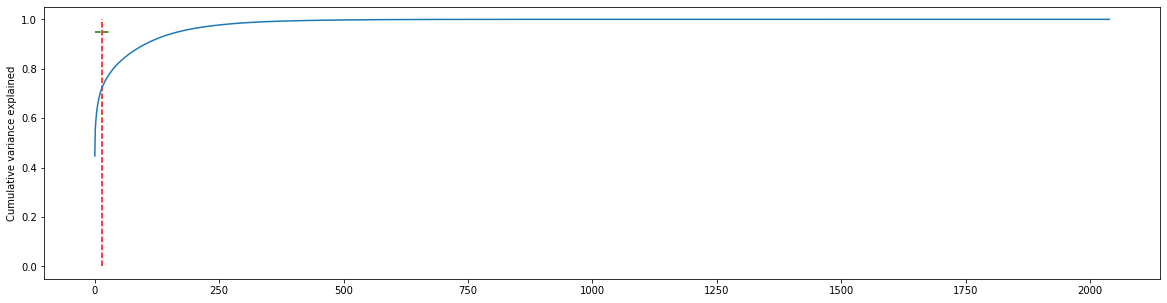

In [88]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [89]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [90]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(2565, 20)
(662, 20)


In [91]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [93]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [94]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[366,   0,   0],
       [  0, 141,   7],
       [  0,   4, 144]], dtype=int64)

In [114]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_pca,y_test, 
                                         display_labels= ['close to total failure','severe lag','small lag','optimal switching behavior'],  ax = ax)
    return disp.confusion_matrix
    

array([[366,   0,   0],
       [  0, 141,   7],
       [  0,   4, 144]], dtype=int64)

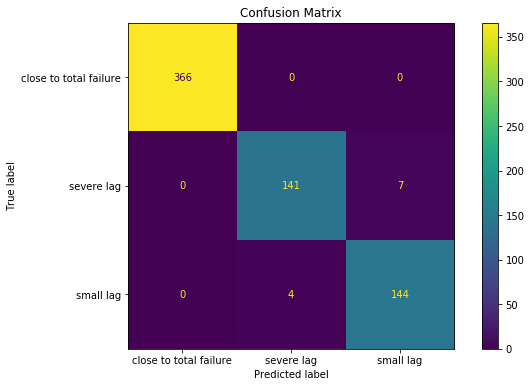

In [96]:
cmatrix(svm_model_linear)

In [98]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.97      0.95      0.96       148
           2       0.95      0.97      0.96       148

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



In [99]:
y_score_svm = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svm

array([[ 2.27713447,  1.31531759, -0.31910877],
       [-0.25673692,  2.2844972 ,  0.76262491],
       [ 2.27652966,  1.31514929, -0.31896506],
       ...,
       [ 2.29889923,  1.3168069 , -0.32177933],
       [-0.27861919,  1.22580947,  2.24983683],
       [ 2.26827766,  1.31431532, -0.31793763]])

In [100]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

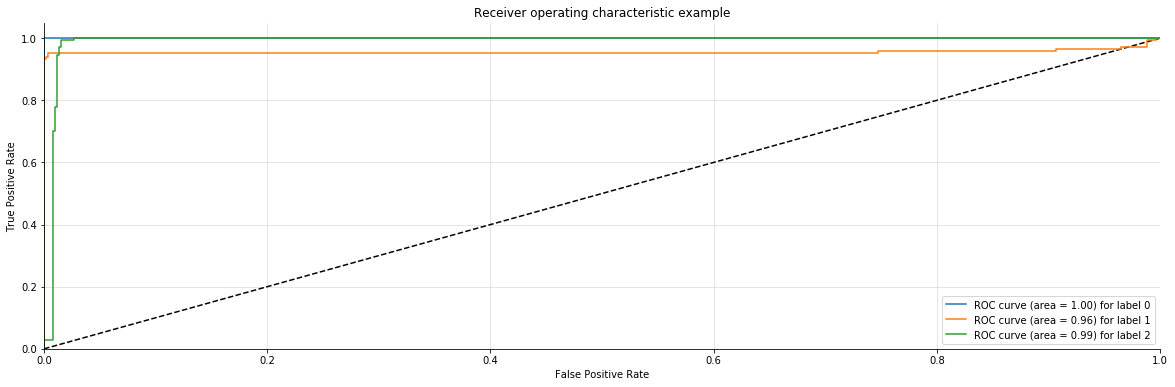

In [101]:
plot_multiclass_roc(y_score_svm,X_test_pca, y_test, 3)

In [102]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.97      0.95      0.96       148
           2       0.95      0.97      0.96       148

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



### Building an RF classifier for Cooler 

In [103]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [130]:
def cmatrixrf(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_scaled,y_test, 
                                         display_labels= ['No leakage','Weak leakage','Severe Leakage'],  ax = ax)
    return disp.confusion_matrix
    

array([[366,   0,   0],
       [  0, 145,   3],
       [  0,   0, 148]], dtype=int64)

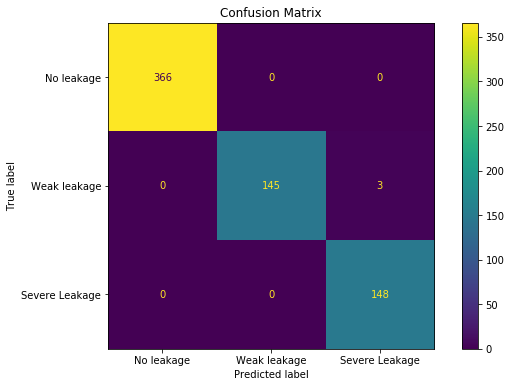

In [131]:
cmatrixrf(classifier_rf)

In [107]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

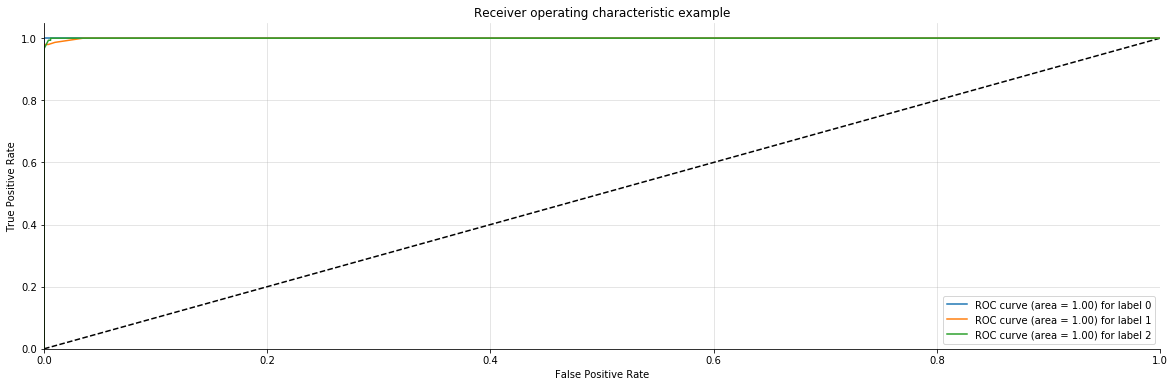

In [108]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [109]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      0.98      0.99       148
           2       0.98      1.00      0.99       148

    accuracy                           1.00       662
   macro avg       0.99      0.99      0.99       662
weighted avg       1.00      1.00      1.00       662



### kNN for Valve classification

In [110]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[361,   4,   1],
       [  0, 137,  11],
       [  0,  23, 125]], dtype=int64)

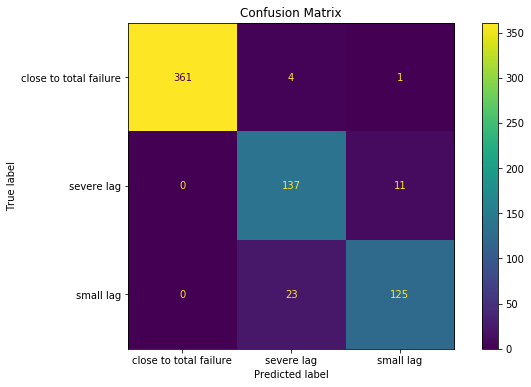

In [132]:
cmatrix(knn)

In [116]:
y_score_knn = knn.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knn

array([[1.        , 0.        , 0.        ],
       [0.        , 0.85714286, 0.14285714],
       [1.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ]])

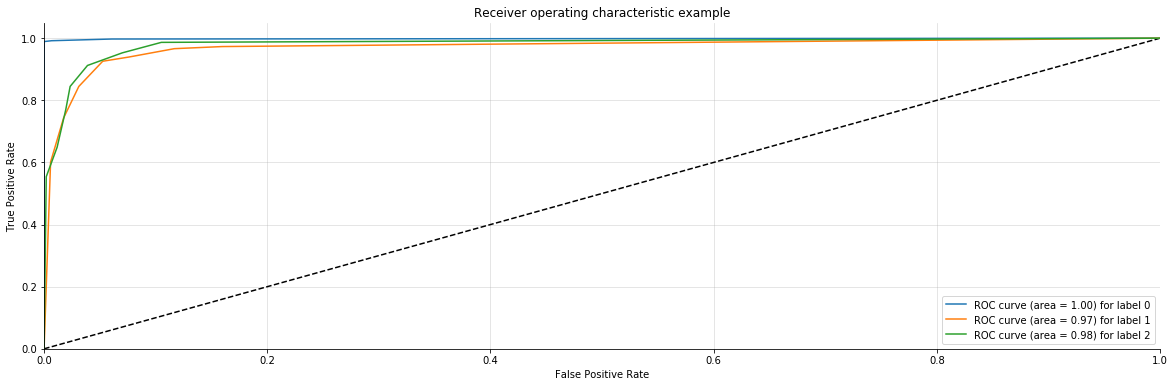

In [117]:
plot_multiclass_roc(y_score_knn, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [118]:
print(metrics.classification_report(y_test, knn.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       366
           1       0.84      0.93      0.88       148
           2       0.91      0.84      0.88       148

    accuracy                           0.94       662
   macro avg       0.92      0.92      0.92       662
weighted avg       0.94      0.94      0.94       662



### Performance in noise

In [119]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)

X_testnoise = X_test_scaled + noise

In [120]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_testnoise)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       366
           1       0.63      0.75      0.69       148
           2       0.88      0.62      0.73       148

    accuracy                           0.84       662
   macro avg       0.81      0.78      0.78       662
weighted avg       0.85      0.84      0.84       662



In [121]:
y_score_rfnoise = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_rfnoise

array([[1. , 0. , 0. ],
       [0.2, 0.5, 0.3],
       [0.6, 0.4, 0. ],
       ...,
       [0.8, 0.2, 0. ],
       [0.2, 0.4, 0.4],
       [0.4, 0.4, 0.2]])

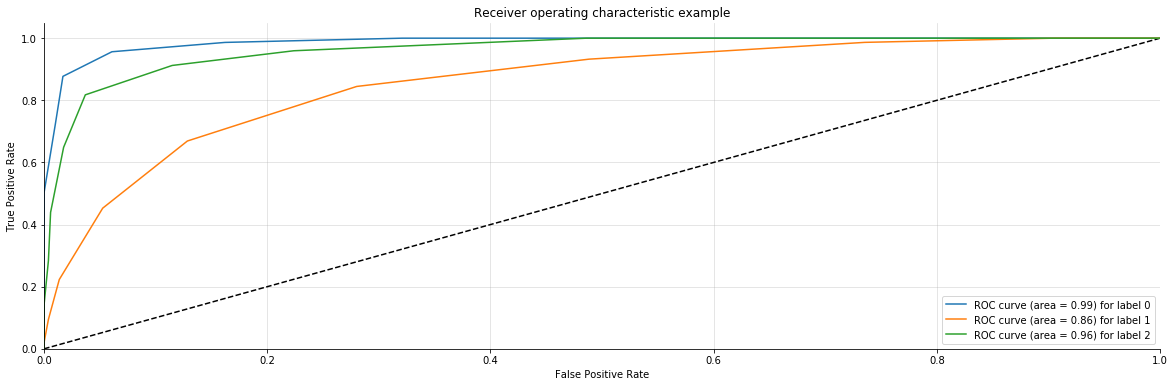

In [122]:
plot_multiclass_roc(y_score_rfnoise, X_testnoise, y_test, n_classes=3, figsize=(20, 6))

In [123]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)

X_testpcanoise = X_test_pca + noise

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       366
           1       0.69      0.83      0.75       148
           2       0.82      0.76      0.79       148

    accuracy                           0.88       662
   macro avg       0.84      0.84      0.84       662
weighted avg       0.89      0.88      0.88       662



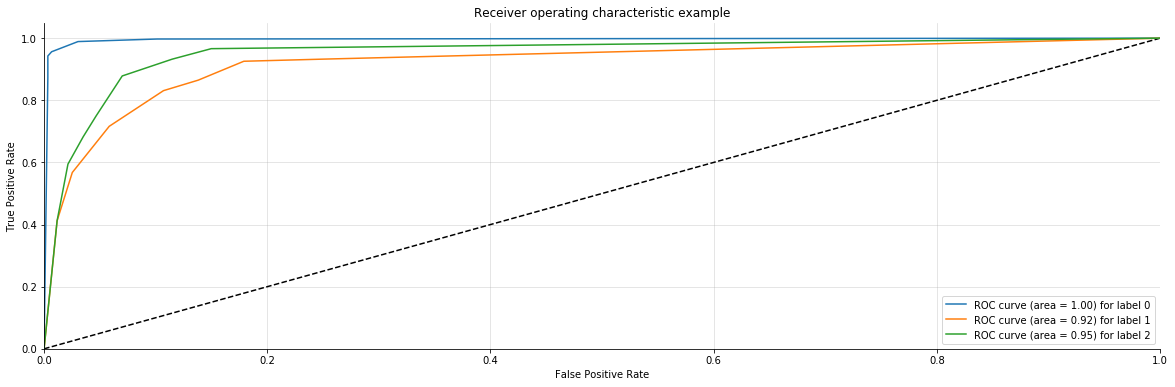

In [124]:
print(metrics.classification_report(y_test, knn.predict(X_testpcanoise)))

y_score_knnnoise = knn.fit(X_train_pca, y_train).predict_proba(X_testpcanoise)
y_score_knnnoise

plot_multiclass_roc(y_score_knnnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))


In [128]:
def cmatrixknnnoise(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_testpcanoise,y_test, 
                                         display_labels= ['No leakage','Weak leakage','Severe Leakage',],  ax = ax)
    return disp.confusion_matrix
    

array([[346,  19,   1],
       [  1, 123,  24],
       [  0,  36, 112]], dtype=int64)

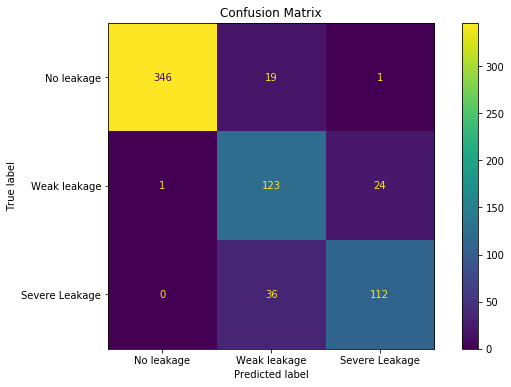

In [129]:
cmatrixknnnoise(knn)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       366
           1       0.59      0.64      0.61       148
           2       0.66      0.63      0.65       148

    accuracy                           0.82       662
   macro avg       0.74      0.75      0.74       662
weighted avg       0.82      0.82      0.82       662



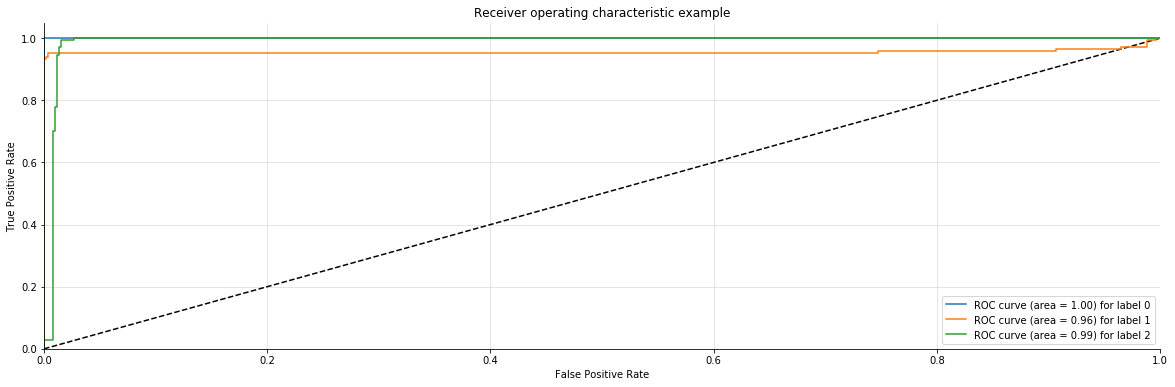

In [125]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testpcanoise)))

y_score_svmnoise = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svmnoise

plot_multiclass_roc(y_score_svmnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))
